<a href="https://colab.research.google.com/github/profandersonvanin01/analisa_ai/blob/main/AnalisaAi_SUICIDIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np

In [3]:
bd = pd.read_csv('https://github.com/ProfAndersonVanin/analisa_ai/raw/refs/heads/main/datasus_suicidio.csv', encoding='latin1')
bd

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [4]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      58634 non-null  object 
 1   ano         58634 non-null  int64  
 2   CIRCOBITO   56606 non-null  object 
 3   DTOBITO     58634 non-null  object 
 4   DTNASC      58407 non-null  object 
 5   SEXO        58619 non-null  object 
 6   RACACOR     57298 non-null  object 
 7   ESTCIV      54305 non-null  object 
 8   ESC         45162 non-null  object 
 9   OCUP        58634 non-null  object 
 10  CODMUNRES   58634 non-null  object 
 11  LOCOCOR     58463 non-null  object 
 12  ASSISTMED   40872 non-null  object 
 13  CAUSABAS    58634 non-null  object 
 14  CAUSABAS_O  58544 non-null  object 
 15  idade       58407 non-null  float64
 16  mes         58634 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.6+ MB


Colunas que precisam de **atenção**



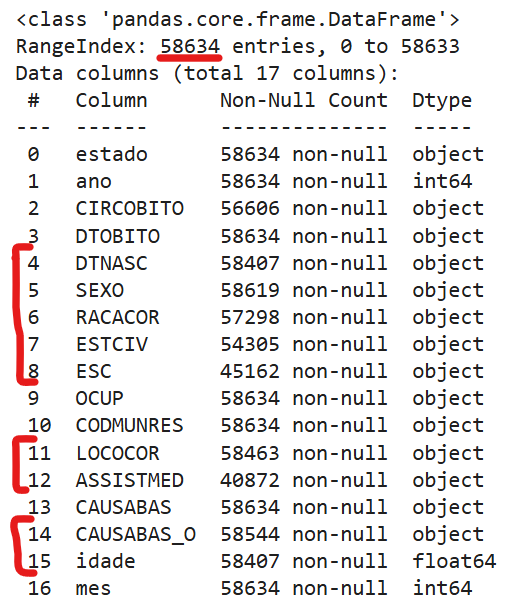

In [5]:
bd.isnull().sum()

estado            0
ano               0
CIRCOBITO      2028
DTOBITO           0
DTNASC          227
SEXO             15
RACACOR        1336
ESTCIV         4329
ESC           13472
OCUP              0
CODMUNRES         0
LOCOCOR         171
ASSISTMED     17762
CAUSABAS          0
CAUSABAS_O       90
idade           227
mes               0
dtype: int64

**TOTAL DE REGISTROS ==> 58634**

- QUANTIDADE DE DADOS NULOS

- CIRCOBTIDO ==> 56606 (3,46%) = 2028
- DTNASC ==> 58407 (0,38%) = 227
- SEXO ==> 58619 (0,026%) = 15
- RACACOR ==> 57298 (2,28%) = 1336
- ESTCIV ==> 54305 (**7,38%**) = 4329
- ESC ==> 45162 (**22,98%**) = 13472
- LOCOCOR ==> 58463 (0,29%) = 171
- ASSISTMED ==> 40872 (**30,29%**) = 17762
- CAUSABAS_O ==> 58544 (0,15%) = 90
- idade ==> 58407 (0,39%) = 227

Colunas que requerem maior atenção são: **ESTCIV**, **ESC** e **ASSISTMED**

As demais colunas como possuem uma porcentagem menor que 5% do total de dados, nestas os registros serão excluídos.

> **Obs.: Isso não é uma regra, foi uma opção minha com base na quantidade de valores nulos!**

In [6]:
# Remover registros com valores nulos apenas nas colunas 'Nome' e 'Idade'
bd2 = bd.dropna(subset=['CIRCOBITO', 'DTNASC', 'SEXO', 'RACACOR', 'LOCOCOR','CAUSABAS_O','idade'])
bd2

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [7]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      54970 non-null  object 
 1   ano         54970 non-null  int64  
 2   CIRCOBITO   54970 non-null  object 
 3   DTOBITO     54970 non-null  object 
 4   DTNASC      54970 non-null  object 
 5   SEXO        54970 non-null  object 
 6   RACACOR     54970 non-null  object 
 7   ESTCIV      51448 non-null  object 
 8   ESC         42726 non-null  object 
 9   OCUP        54970 non-null  object 
 10  CODMUNRES   54970 non-null  object 
 11  LOCOCOR     54970 non-null  object 
 12  ASSISTMED   38937 non-null  object 
 13  CAUSABAS    54970 non-null  object 
 14  CAUSABAS_O  54970 non-null  object 
 15  idade       54970 non-null  float64
 16  mes         54970 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.5+ MB


In [8]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV         3522
ESC           12244
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ESTCIV**

Temos a seguinte informação a respeito desta coluna:

- **ESTCIV**: 1: Solteiro, 2: Casado, 3: Viúvo, 4: Separado judicialmente, 5: União consensual, 0;6;7;8;9: NA.

Vamos analisar a ocorrência individual de valores nesta coluna:

In [9]:
bd2['ESTCIV'].unique()

array(['Casado', 'União consensual', nan, 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

In [10]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ESTCIV'] = bd2['ESTCIV'].fillna('Não Informado')

In [11]:
bd2['ESTCIV'].unique()

array(['Casado', 'União consensual', 'Não Informado', 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

In [12]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV            0
ESC           12244
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ESC**

Temos a seguinte informação a respeito desta coluna:

- **ESC**: 1 : Nenhuma, 2: 1 a 3 anos, 3 : 4 a 7 anos, 4 : 8 a 11 anos, 5 : 12 e mais, 8 : De 9 a 11 anos, 0;6;7;9;A : NA .

Vamos analisar a ocorrência individual de valores nesta coluna:

In [13]:
bd2['ESC'].unique()

array(['4 a 7 anos', '12 e mais', nan, '8 a 11 anos', '1 a 3 anos',
       'Nenhuma'], dtype=object)

In [14]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ESC'] = bd2['ESC'].fillna('Não Informado')

In [15]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV            0
ESC               0
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ASSISTMED**

Temos a seguinte informação a respeito desta coluna:

Assistência médica

- **ASSISTMED**: 1: Sim, 2: Não, 9: NA.

Vamos analisar a ocorrência individual de valores nesta coluna:

In [16]:
bd2['ASSISTMED'].unique()

array(['Não', nan, 'Sim'], dtype=object)

In [17]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ASSISTMED'] = bd2['ASSISTMED'].fillna('Não Informado')

In [18]:
bd2.isnull().sum()

estado        0
ano           0
CIRCOBITO     0
DTOBITO       0
DTNASC        0
SEXO          0
RACACOR       0
ESTCIV        0
ESC           0
OCUP          0
CODMUNRES     0
LOCOCOR       0
ASSISTMED     0
CAUSABAS      0
CAUSABAS_O    0
idade         0
mes           0
dtype: int64

**NESTE PONTO NÃO TEMOS MAIS DADOS NULOS OU FALTANTES.**

A base inicial possuia `58634` registros e agora estamos com `54970`.

Na etapa de remoção de dados nulos removemos `6,25%` do total de registros.

In [19]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      54970 non-null  object 
 1   ano         54970 non-null  int64  
 2   CIRCOBITO   54970 non-null  object 
 3   DTOBITO     54970 non-null  object 
 4   DTNASC      54970 non-null  object 
 5   SEXO        54970 non-null  object 
 6   RACACOR     54970 non-null  object 
 7   ESTCIV      54970 non-null  object 
 8   ESC         54970 non-null  object 
 9   OCUP        54970 non-null  object 
 10  CODMUNRES   54970 non-null  object 
 11  LOCOCOR     54970 non-null  object 
 12  ASSISTMED   54970 non-null  object 
 13  CAUSABAS    54970 non-null  object 
 14  CAUSABAS_O  54970 non-null  object 
 15  idade       54970 non-null  float64
 16  mes         54970 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.5+ MB


In [20]:
bd2

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


Veja que temos as colunas: `DTOBITO`, `DTNASC` e `idade`. Há outra coluna chamado `ano`.

Vamos manter a coluna `ano` e `idade`. As outras duas não são necessárias.

Outro tipo de tratamento que pode ser feito é converter o valor da coluna `idade` para inteiro.

In [21]:
# Remover colunas 'Cidade' e 'Estado'
bd3 = bd2.drop(columns=['DTOBITO', 'DTNASC'])

In [22]:
bd3

,estado,ano,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [23]:
# Converter valores da coluna 'Idade' para inteiro
bd3['idade'] = bd3['idade'].astype(int)

In [24]:
bd3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estado      54970 non-null  object
 1   ano         54970 non-null  int64 
 2   CIRCOBITO   54970 non-null  object
 3   SEXO        54970 non-null  object
 4   RACACOR     54970 non-null  object
 5   ESTCIV      54970 non-null  object
 6   ESC         54970 non-null  object
 7   OCUP        54970 non-null  object
 8   CODMUNRES   54970 non-null  object
 9   LOCOCOR     54970 non-null  object
 10  ASSISTMED   54970 non-null  object
 11  CAUSABAS    54970 non-null  object
 12  CAUSABAS_O  54970 non-null  object
 13  idade       54970 non-null  int32 
 14  mes         54970 non-null  int64 
dtypes: int32(1), int64(2), object(12)
memory usage: 6.5+ MB


Renomeando as colunas para ficarem no mesmo formato

In [25]:
# Renomear colunas
bd3 = bd3.rename(columns={'estado': 'ESTADO', 'ano': 'ANO','idade':'IDADE','mes':'MES'})
bd3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESTADO      54970 non-null  object
 1   ANO         54970 non-null  int64 
 2   CIRCOBITO   54970 non-null  object
 3   SEXO        54970 non-null  object
 4   RACACOR     54970 non-null  object
 5   ESTCIV      54970 non-null  object
 6   ESC         54970 non-null  object
 7   OCUP        54970 non-null  object
 8   CODMUNRES   54970 non-null  object
 9   LOCOCOR     54970 non-null  object
 10  ASSISTMED   54970 non-null  object
 11  CAUSABAS    54970 non-null  object
 12  CAUSABAS_O  54970 non-null  object
 13  IDADE       54970 non-null  int32 
 14  MES         54970 non-null  int64 
dtypes: int32(1), int64(2), object(12)
memory usage: 6.5+ MB


In [26]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7


Vejam que na coluna OCUP aparecem alguns valores estranhos:

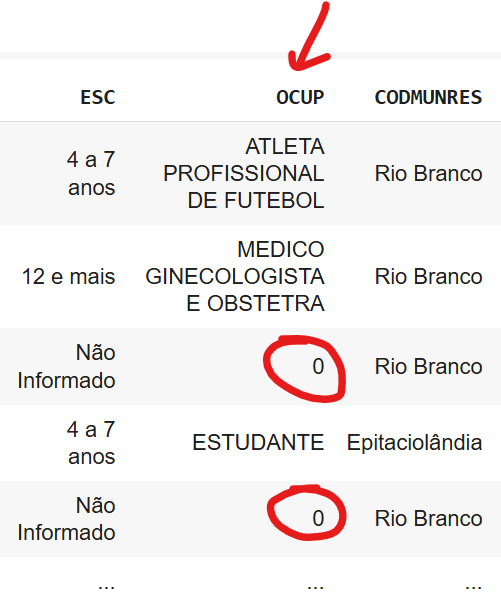

0 = sem profissao

- Tratar esses valores....

- Verificar valores unicos em todas as colunas e ver se encontram mais alguma assim...

...

In [27]:
bd3['OCUP'].unique()

array(['ATLETA PROFISSIONAL DE FUTEBOL',
       'MEDICO GINECOLOGISTA E OBSTETRA', '0', ..., 'CATADOR DE MARISCOS',
       'SUBTENENTE BOMBEIRO MILITAR',
       'GERENTE DE PESQUISA E DESENVOLVIMENTO (P&D)'], dtype=object)

Na coluna 'OCUP' temos o dado: 0, que se refere a pessoas desempregadas 

In [28]:
# Substituir os valores '0' da coluna 'OCUP' por 'DESEMPREGADO'
bd3.loc[bd3['OCUP'] == '0', 'OCUP'] = 'DESEMPREGADO'

In [29]:
bd3[bd3['OCUP'] == 'DESEMPREGADO']

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2
5,AC,2014,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,51,2
6,AC,2014,Suicídio,Masculino,Parda,Solteiro,1 a 3 anos,DESEMPREGADO,Senador Guiomard,Outros,Não,X700,X700,25,2
8,AC,2014,Suicídio,Masculino,Branca,Casado,12 e mais,DESEMPREGADO,Cruzeiro do Sul,Domicílio,Não,X702,X702,39,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58606,TO,2018,Suicídio,Masculino,Parda,Separado judicialmente,4 a 7 anos,DESEMPREGADO,Tocantinópolis,Domicílio,Não,X700,X700,31,9
58612,TO,2018,Suicídio,Masculino,Parda,Solteiro,1 a 3 anos,DESEMPREGADO,Araguatins,Domicílio,Não Informado,X700,X700,54,11
58615,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,DESEMPREGADO,Wanderlândia,Outros,Não Informado,X701,X701,26,12
58617,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,DESEMPREGADO,Nova Olinda,Via pública,Não,X824,X824,29,12


Na coluna 'LOCOCOR' temos o dado anormal "6" que por não ter muitas informações do que ele possa ser e ter poucos registros(6 linhas), irei colocar esses dados na categoria "Outros"

In [30]:
bd3['LOCOCOR'].unique()

array(['Domicílio', 'Outros', 'Hospital', 'Via pública',
       'Outro estabelecimento de saúde', '6'], dtype=object)

In [31]:
bd3[bd3['LOCOCOR'] == '6']

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
10920,AM,2015,Suicídio,Masculino,Indígena,União consensual,Não Informado,PRODUTOR AGRICOLA POLIVALENTE,Jutaí,6,Sim,X689,X689,24,6
22102,AM,2016,Suicídio,Feminino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Tabatinga,6,Não,X709,X709,13,1
22104,AM,2016,Suicídio,Feminino,Indígena,União consensual,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Benjamin Constant,6,Não,X709,X709,18,3
22106,AM,2016,Suicídio,Feminino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Benjamin Constant,6,Não,X709,X709,17,4
22287,AM,2016,Suicídio,Masculino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Tabatinga,6,Não,X709,X709,17,4
22289,AM,2016,Suicídio,Masculino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,São Paulo de Olivença,6,Não,X709,X709,29,7


In [32]:
# Substituir os valores '6' da coluna 'LOCOCOR' por 'Outros'
bd3.loc[bd3['LOCOCOR'] == '6', 'LOCOCOR'] = 'Outros'

Agora temos nossos dados limpo para a analise

In [33]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7


##### O Estado das pessoas impactam na saude mental da pessoa/ Qual é a distribuição de óbitos por estado ao longo dos anos?

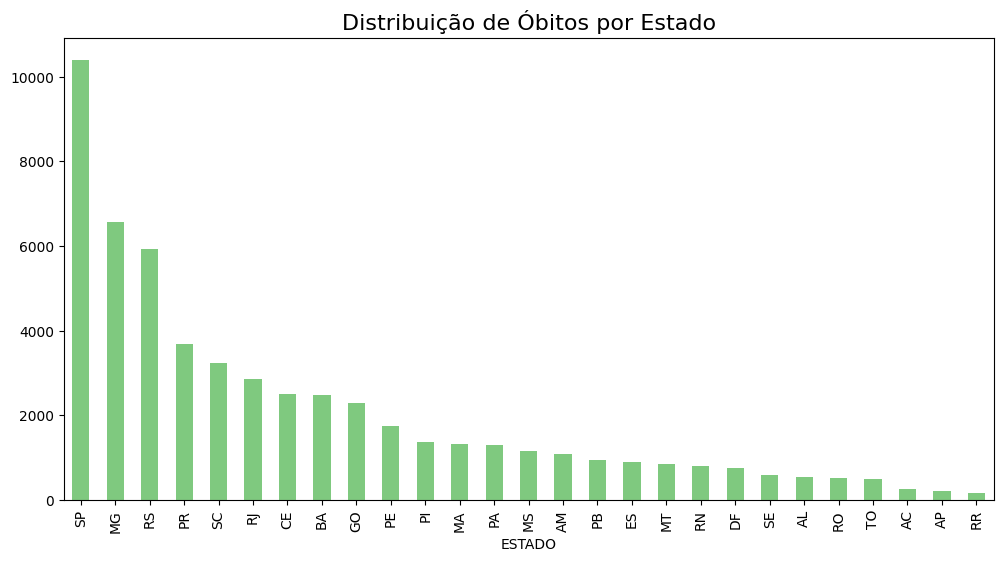

In [ ]:
sns.set_palette('Accent')
plt.figure(figsize=(12, 6))

bd3['ESTADO'].value_counts().plot.bar()
plt.title('Distribuição de Óbitos por Estado', fontsize=16)

plt.show()

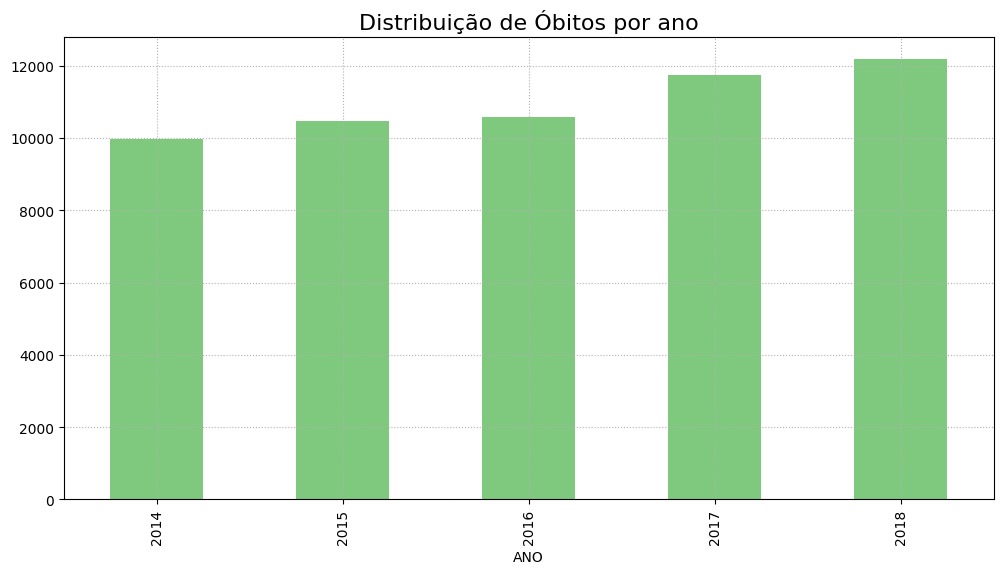

In [61]:
sns.set_palette('Accent')
plt.figure(figsize=(12, 6))
bd3['ANO'].value_counts().sort_index().plot.bar()

plt.title('Distribuição de Óbitos por ano', fontsize=16)
plt.grid(linestyle=':')

plt.show()

<Figure size 2000x1000 with 0 Axes>

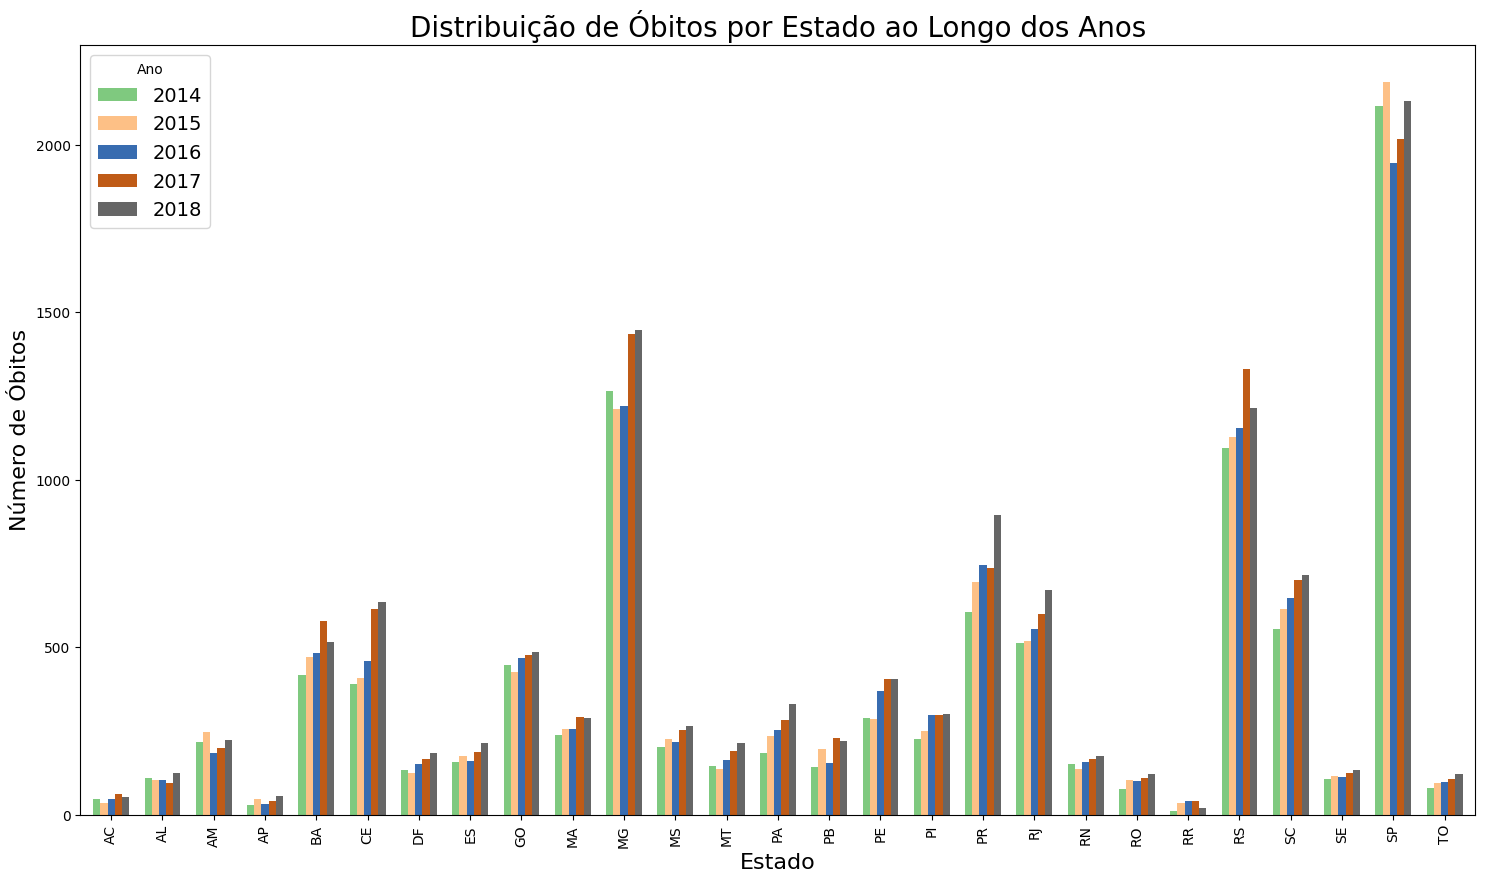

In [63]:
estado_ano = bd3.groupby(['ESTADO', 'ANO']).size().unstack()

plt.figure(figsize=(20, 10))
estado_ano.plot(kind='bar', stacked=False, figsize=(18, 10), cmap='Accent', width=0.7)

plt.title('Distribuição de Óbitos por Estado ao Longo dos Anos', fontsize=20)
plt.ylabel('Número de Óbitos', fontsize=16)
plt.xlabel('Estado', fontsize=16)
plt.legend(title='Ano', fontsize=14)

plt.show()

<Figure size 2000x1000 with 0 Axes>

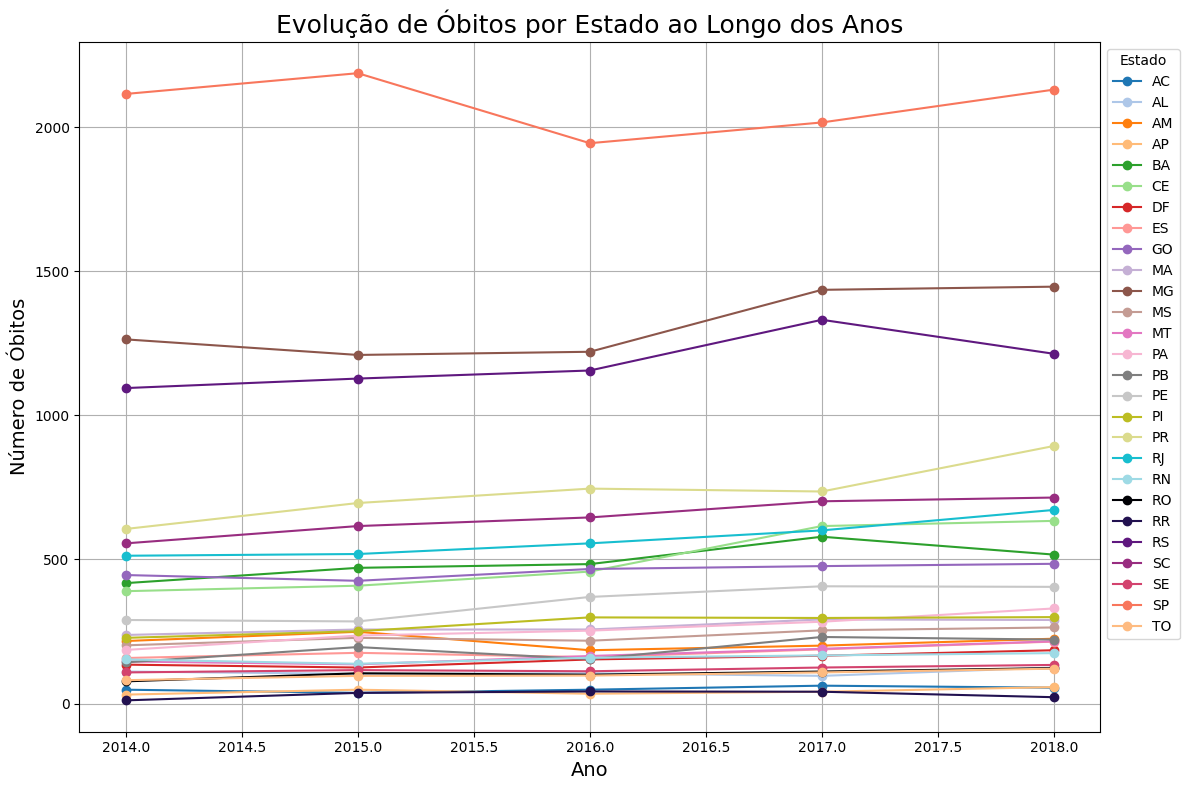

In [36]:
tab20_colors = plt.cm.tab20(np.linspace(0, 1, 20))  
accent_colors = plt.cm.magma(np.linspace(0, 1, 8)) 
combined_colors = np.vstack((tab20_colors, accent_colors))

plt.figure(figsize=(20, 10))
estado_ano.T.plot(kind='line', figsize=(12, 8), marker='o', color=combined_colors)

plt.title('Evolução de Óbitos por Estado ao Longo dos Anos', fontsize=18)
plt.ylabel('Número de Óbitos', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.legend(title='Estado', bbox_to_anchor=(1,1))
plt.grid(linestyle='-')
plt.tight_layout()
plt.show()

________________________________________________________________________________________________________________________________________________

### Tem diferenças no número de Óbitos por sexo?

Text(0.5, 1.0, 'Diferença por sexo')

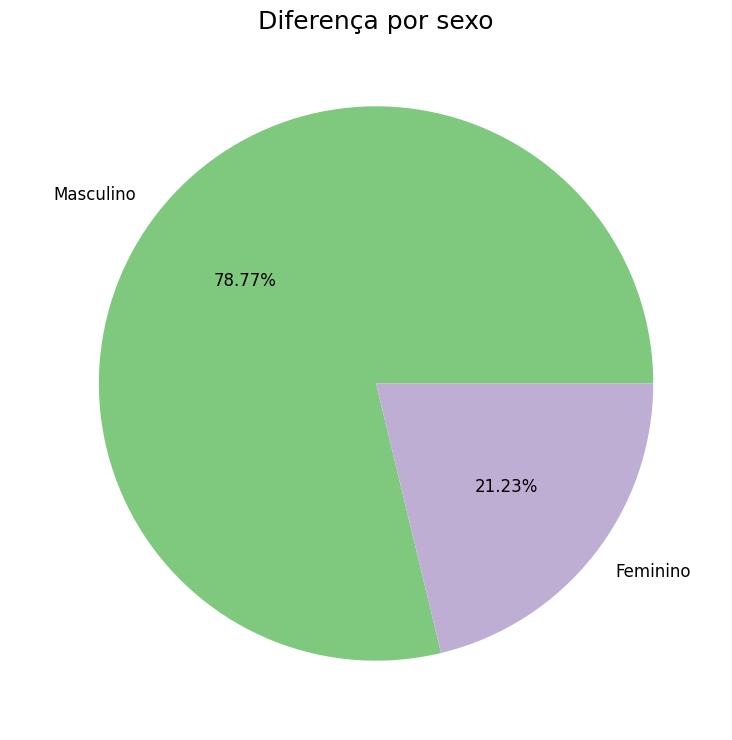

In [72]:
bd3['SEXO'].value_counts().plot.pie(autopct='%0.2f%%', fontsize=12, figsize=(9, 9))
plt.ylabel(' ')

plt.title('Diferença por sexo', fontsize=18)

<Figure size 1400x1400 with 0 Axes>

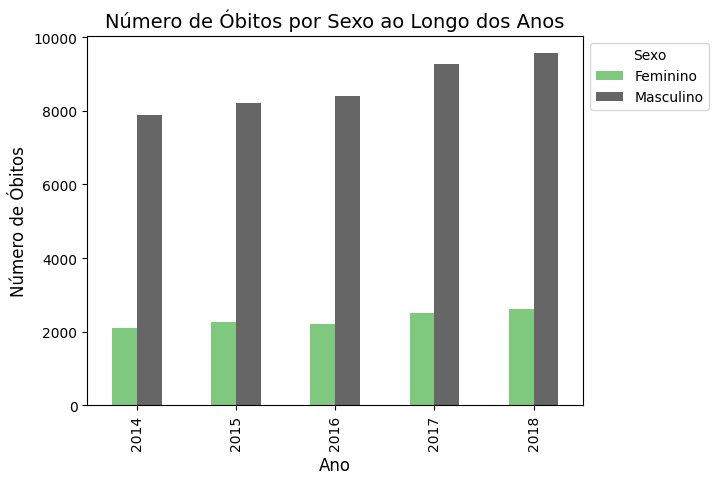

In [117]:
sexo_ano = bd3.groupby(['ANO', 'SEXO']).size().unstack()

plt.figure(figsize=(14, 14))
sexo_ano.plot(kind='bar', cmap='Accent')

plt.title('Número de Óbitos por Sexo ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)

plt.legend(title='Sexo', bbox_to_anchor=(1,1))
plt.show()

In [112]:
masculino = bd3[bd3['SEXO'] == 'Masculino'].shape[0]
feminino = bd3[bd3['SEXO'] == 'Feminino'].shape[0]

total_obitos = masculino + feminino

percentual_masculino = (masculino / total_obitos) * 100
percentual_feminino = (feminino / total_obitos) * 100

diferenca_percentual = percentual_masculino - percentual_feminino

print(f'O percentual Masculino e {diferenca_percentual:.2f}% maior que o feminino')

O percentual Masculino e 57.53% maior que o feminino


### Como a idade dos falecidos varia entre os estados ou ao longo dos anos?

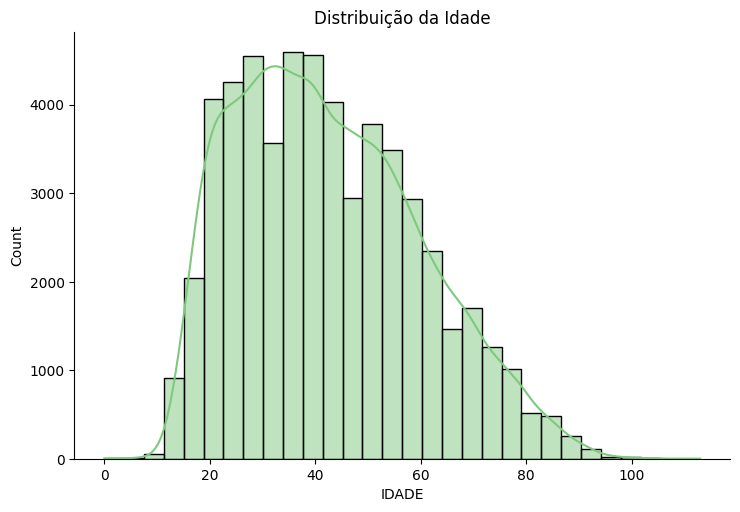

In [115]:
sns.set_palette('Accent')
sns.displot(bd3['IDADE'], kde=True, bins=30, aspect=1.5)

plt.title('Distribuição da Idade')
plt.show()

In [ ]:
# nao consegui colocar de um modo mais legivel
idadeEstado = bd3.groupby('ESTADO')['IDADE']
print('Media por estado')
print(idadeEstado.mean())
print('Mediana por estado')
print(idadeEstado.median())
print('Minimo por estado')
print(idadeEstado.min())
print('Maximo por estado')
print(idadeEstado.max())

Media por estado
ESTADO
AC    32.828000
AL    38.822222
AM    31.731662
AP    31.824645
BA    43.043742
CE    42.349422
DF    39.048429
ES    43.279510
GO    41.574967
MA    39.360570
MG    43.166768
MS    36.882504
MT    40.577960
PA    35.871218
PB    43.682875
PE    42.870803
PI    41.939636
PR    43.056552
RJ    44.344635
RN    43.566919
RO    38.294574
RR    30.098039
RS    48.421097
SC    45.580216
SE    40.710924
SP    41.973646
TO    40.401590
Name: IDADE, dtype: float64
Mediana por estado
ESTADO
AC    30.0
AL    36.0
AM    28.0
AP    28.0
BA    41.0
CE    40.0
DF    37.0
ES    42.0
GO    39.0
MA    35.0
MG    42.0
MS    34.0
MT    38.0
PA    32.0
PB    42.0
PE    41.0
PI    38.0
PR    42.0
RJ    43.0
RN    42.0
RO    35.0
RR    25.0
RS    49.0
SC    46.0
SE    39.0
SP    40.0
TO    37.0
Name: IDADE, dtype: float64
Minimo por estado
ESTADO
AC    13
AL     0
AM     9
AP    12
BA    10
CE     7
DF    13
ES     4
GO     4
MA    11
MG     7
MS     8
MT    12
PA     4
PB    13
PE   

In [128]:
idadeANO = bd3.groupby('ANO')['IDADE']
print('Media por ANO')
print(idadeANO.mean())
print('Mediana por ANO')
print(idadeANO.median())
print('Minimo por ANO')
print(idadeANO.min())
print('Maximo por ANO')
print(idadeANO.max())

Media por ANO
ANO
2014    42.007725
2015    42.773994
2016    42.822774
2017    42.660628
2018    42.614475
Name: IDADE, dtype: float64
Mediana por ANO
ANO
2014    40.0
2015    41.0
2016    41.0
2017    41.0
2018    41.0
Name: IDADE, dtype: float64
Minimo por ANO
ANO
2014    3
2015    4
2016    0
2017    5
2018    2
Name: IDADE, dtype: int32
Maximo por ANO
ANO
2014    101
2015    113
2016    101
2017    112
2018    103
Name: IDADE, dtype: int32


In [130]:
FaixaEstado = bd3.groupby(['ESTADO', 'CATEGORIA_IDADE']).size().unstack()
print("Distribuição de categorias de idade por estado:")
print(FaixaEstado)

Distribuição de categorias de idade por estado:
CATEGORIA_IDADE  Adulto  Idoso  Jovem
ESTADO                               
AC                  148     16     86
AL                  338     73    129
AM                  598     66    413
AP                  113     14     84
BA                 1638    466    365
CE                 1634    437    436
DF                  509     90    165
ES                  670    136     92
GO                 1475    397    429
MA                  832    207    295
MG                 4642   1065    871
MS                  669    144    353
MT                  547    132    174
PA                  734    153    402
PB                  608    187    151
PE                 1116    336    305
PI                  860    268    247
PR                 2443    655    580
RJ                 1874    601    386
RN                  500    159    133
RO                  314     67    135
RR                   68     10     75
RS                 3560   1702    663
SC

Distribuição de categorias de idade por estado:
CATEGORIA_IDADE  Adulto  Idoso  Jovem
ESTADO                               
AC                  148     16     86
AL                  338     73    129
AM                  598     66    413
AP                  113     14     84
BA                 1638    466    365
CE                 1634    437    436
DF                  509     90    165
ES                  670    136     92
GO                 1475    397    429
MA                  832    207    295
MG                 4642   1065    871
MS                  669    144    353
MT                  547    132    174
PA                  734    153    402
PB                  608    187    151
PE                 1116    336    305
PI                  860    268    247
PR                 2443    655    580
RJ                 1874    601    386
RN                  500    159    133
RO                  314     67    135
RR                   68     10     75
RS                 3560   1702    663
SC

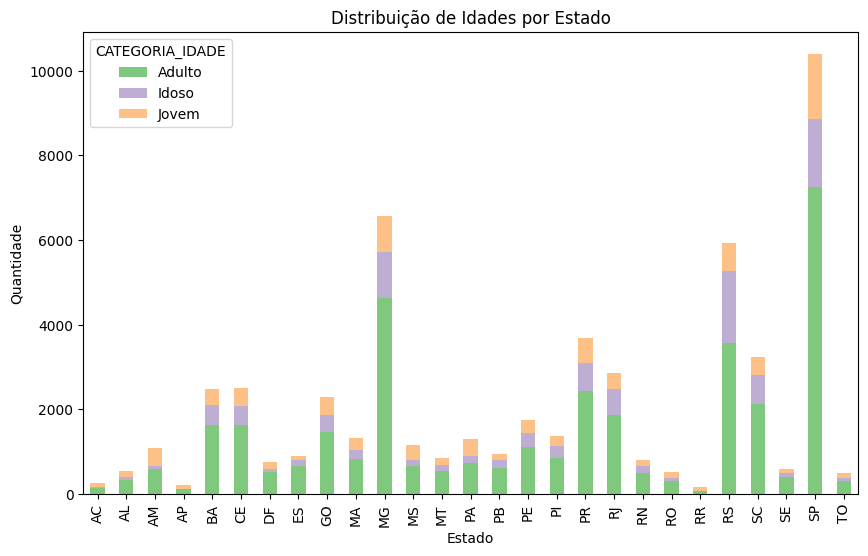

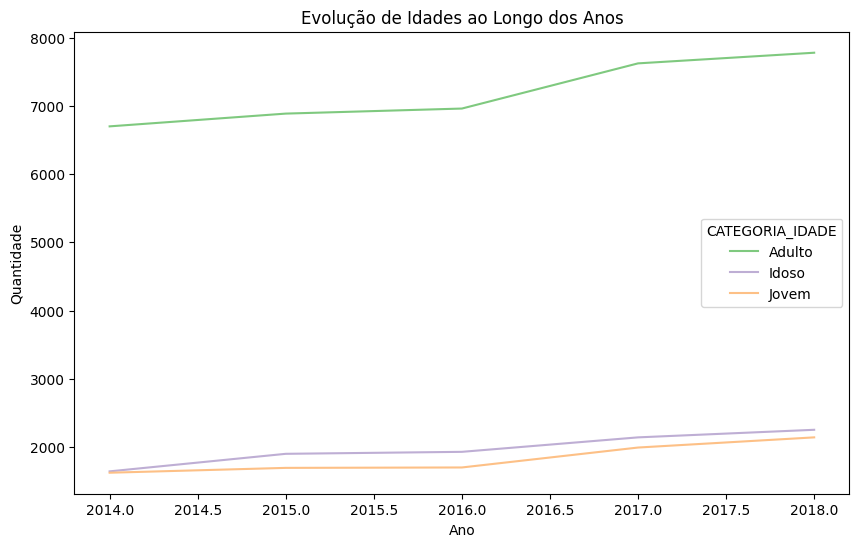

In [ ]:
idadeANO = bd3.groupby(['ANO', 'CATEGORIA_IDADE']).size().unstack()
print("\nDistribuição de categorias de idade por ano:")
print(idadeANO)

idadeEstado.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribuição de Idades por Estado")
plt.ylabel("Quantidade")
plt.xlabel("Estado")
plt.show()

idadeANO.plot(kind='line', figsize=(10, 6))
plt.title("Evolução de Idades ao Longo dos Anos")
plt.ylabel("Quantidade")
plt.xlabel("Ano")
plt.show()

In [113]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES,CATEGORIA_IDADE
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1,Adulto
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1,Adulto
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1,Idoso
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2,Jovem
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4,Adulto
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5,Adulto
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5,Idoso
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7,Jovem


<Axes: xlabel='MES'>

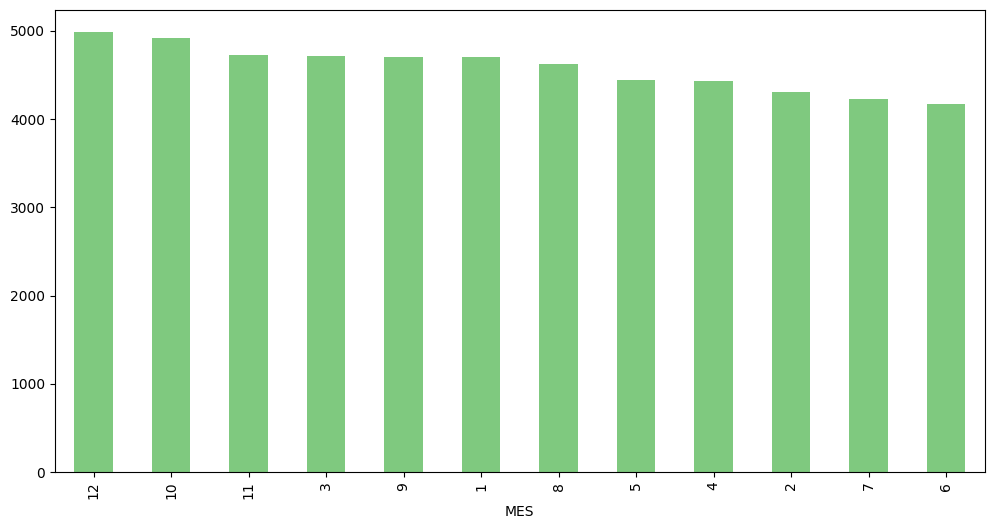

In [39]:
plt.figure(figsize=(12, 6))
bd3['MES'].value_counts().plot.bar()

<Axes: xlabel='RACACOR'>

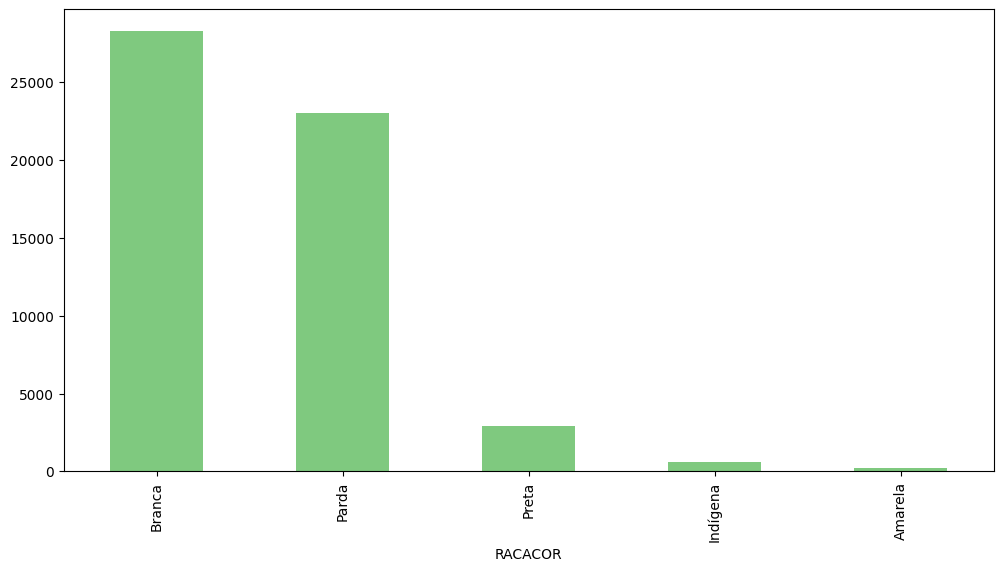

In [40]:
plt.figure(figsize=(12, 6))
bd3['RACACOR'].value_counts().plot.bar()

<Axes: ylabel='count'>

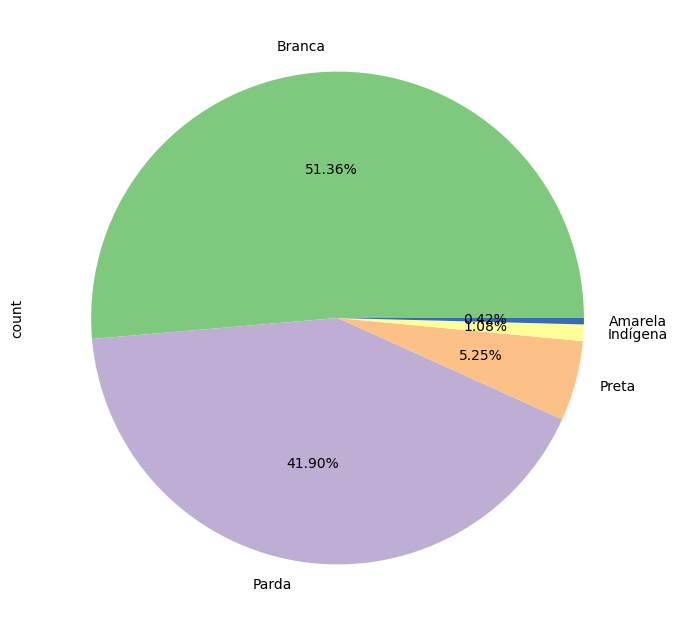

In [41]:
bd3['RACACOR'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

In [42]:
def classificarIdade(idade):
    if idade <= 24:
        return 'Jovem'
    elif 24 < idade <= 59:
        return 'Adulto'
    else:
        return 'Idoso'
    
bd3['CATEGORIA_IDADE'] = bd3['IDADE'].apply(classificarIdade)

In [43]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES,CATEGORIA_IDADE
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1,Adulto
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1,Adulto
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1,Idoso
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2,Jovem
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4,Adulto
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5,Adulto
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5,Idoso
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7,Jovem


<Axes: ylabel='count'>

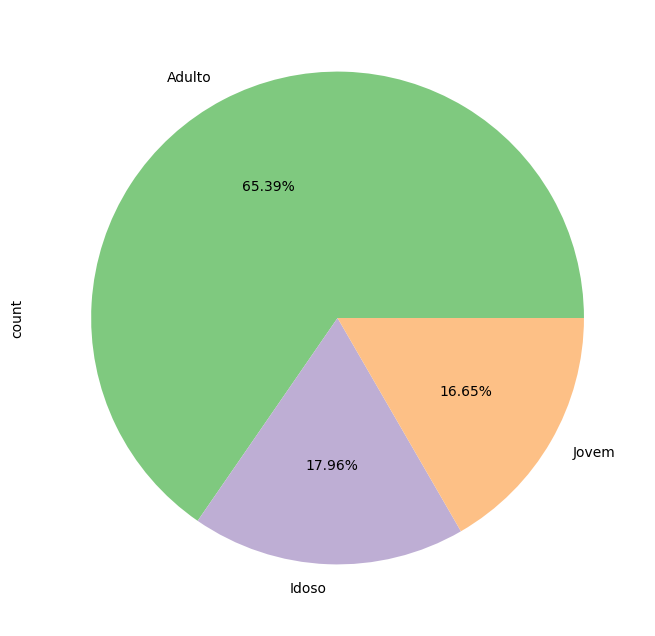

In [44]:
bd3['CATEGORIA_IDADE'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

<Axes: xlabel='CIRCOBITO'>

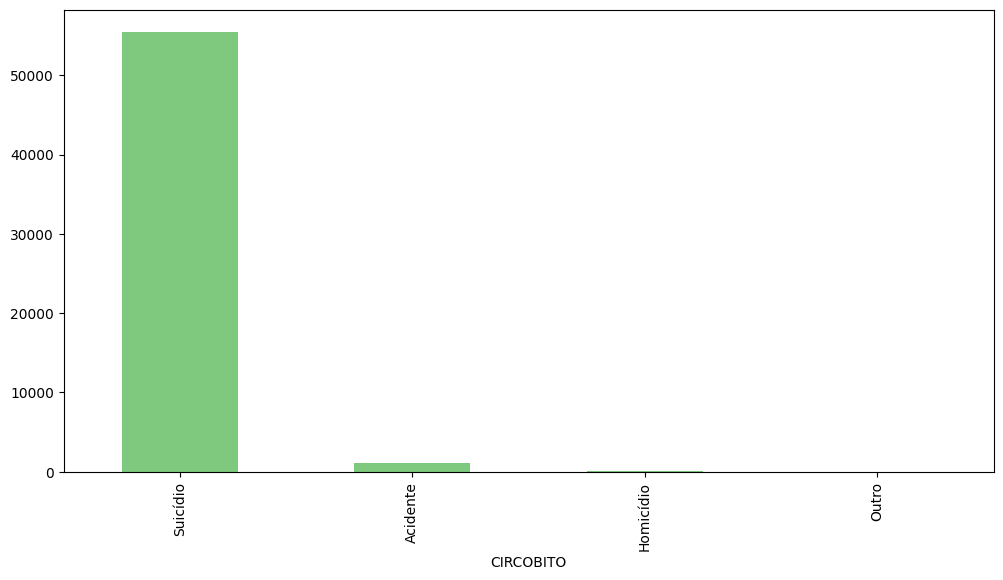

In [45]:
plt.figure(figsize=(12, 6))
bd['CIRCOBITO'].value_counts().plot.bar()

<Axes: >

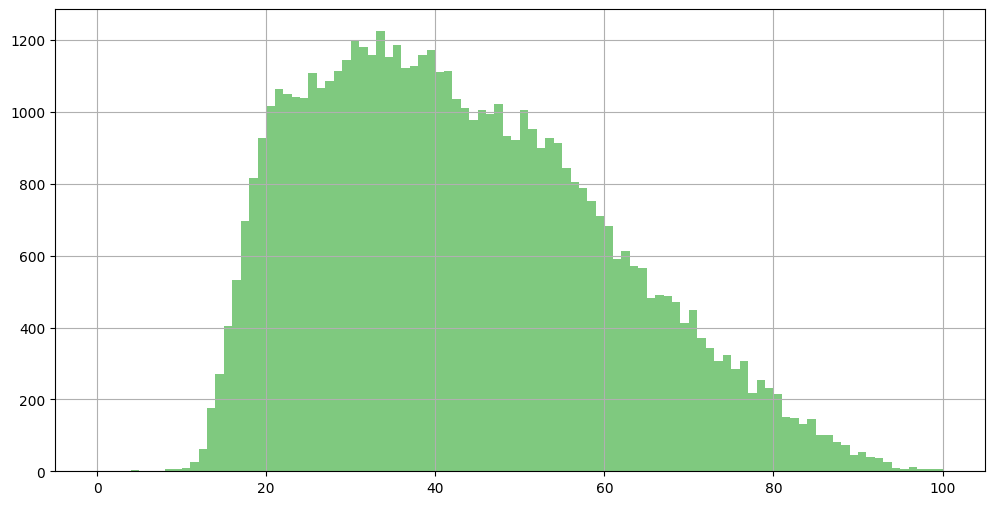

In [46]:
plt.figure(figsize=(12, 6))
bd3['IDADE'].hist(density=False, bins=100, range=[0,100])

<Axes: ylabel='IDADE'>

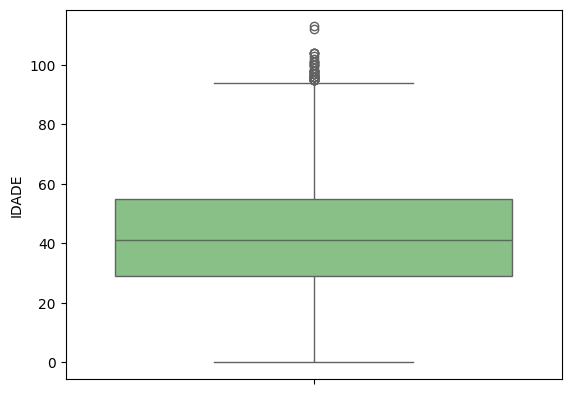

In [47]:
sns.boxplot(y='IDADE', data=bd3)

In [110]:
bd3.describe()

,ANO,IDADE,MES
count,54970.000000,54970.000000,54970.000000
mean,2016.103456,42.584883,6.593287
std,1.415966,17.362850,3.499636
min,2014.000000,0.000000,1.000000
25%,2015.000000,29.000000,4.000000
50%,2016.000000,41.000000,7.000000
75%,2017.000000,55.000000,10.000000
max,2018.000000,113.000000,12.000000
